Aquí tienes unas notas en formato Markdown que explican el funcionamiento del código paso a paso:

---

# Explicación del Código

Este código genera datos sintéticos para un problema de regresión lineal, calcula una densidad predictiva basada en residuos estudentizados y visualiza la densidad suavizada junto con el valor real de la etiqueta.

---

## 1. **Generación de Datos Sintéticos**

### Función: `generate_synthetic_data(n, p, seed=42)`

- **Propósito**: Genera datos sintéticos para un problema de regresión lineal.
- **Parámetros**:
  - `n`: Número de observaciones.
  - `p`: Número de atributos.
  - `seed`: Semilla para reproducibilidad.
- **Proceso**:
  1. Genera una matriz `X` de tamaño `(n x p)` con valores aleatorios de una distribución normal estándar.
  2. Añade una columna de 1s a `X` para representar el término de sesgo (bias).
  3. Genera un vector de pesos `true_w` de tamaño `(p + 1)` con valores aleatorios.
  4. Calcula las etiquetas `y` como una combinación lineal de `X` y `true_w`, añadiendo ruido gaussiano.
- **Retorno**:
  - `X`: Matriz de atributos con la columna de 1s.
  - `y`: Vector de etiquetas.

---

## 2. **Cálculo de la Matriz Hat**

### Función: `compute_hat_matrix(X)`

- **Propósito**: Calcula la matriz hat, que se utiliza para proyectar los valores observados en los valores predichos.
- **Fórmula**:
  $$
  H = X(X^T X)^{-1}X^T
  $$
- **Parámetros**:
  - `X`: Matriz de atributos (incluyendo la columna de 1s).
- **Retorno**:
  - `H`: Matriz hat de tamaño `(n x n)`.

---

## 3. **Cálculo de \(A_i\) y \(B_i\)**

### Función: `compute_A_and_B(X_train, y, hat_matrix, i)`

- **Propósito**: Calcula los términos \(A_i\) y \(B_i\) para ajustar la distribución predictiva basada en residuos estudentizados.
- **Parámetros**:
  - `X_train`: Matriz de atributos de entrenamiento.
  - `y`: Vector de etiquetas.
  - `hat_matrix`: Matriz hat calculada para los datos extendidos (entrenamiento + prueba).
  - `i`: Índice de la observación a procesar.
- **Proceso**:
  1. Calcula la matriz hat solo para los datos de entrenamiento.
  2. Calcula las predicciones \(\hat{y}\) usando la matriz hat de entrenamiento.
  3. Calcula \(B_i\) como una combinación de los elementos de la matriz hat.
  4. Calcula \(A_i\) como una combinación lineal de los residuos estudentizados.
- **Retorno**:
  - \(A_i\), \(B_i\): Términos utilizados para ajustar la distribución predictiva.

---

## 4. **Cálculo de la Densidad Predictiva**

### Función: `compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=False, sigma=0.2)`

- **Propósito**: Calcula y visualiza la función de densidad predictiva suavizada.
- **Parámetros**:
  - `X_train`: Matriz de atributos de entrenamiento.
  - `y_train`: Vector de etiquetas de entrenamiento.
  - `x_test`: Vector de atributos de prueba.
  - `true_y`: Valor real de la etiqueta para el punto de prueba.
  - `y_range`: Intervalo de valores de `y` para calcular la densidad.
  - `plot`: Booleano para decidir si se visualiza la densidad.
  - `sigma`: Parámetro de suavizado para el filtro gaussiano.
- **Proceso**:
  1. Extiende la matriz `X` para incluir el punto de prueba.
  2. Calcula la matriz hat para los datos extendidos.
  3. Calcula los términos \(A_i\) y \(B_i\) para cada observación de entrenamiento.
  4. Ordena los valores \(C = A_i / B_i\) y define los cuantiles.
  5. Calcula la densidad predictiva como una función escalonada basada en los cuantiles.
  6. Aplica un filtro gaussiano para suavizar la densidad.
  7. Si `plot=True`, visualiza la densidad suavizada junto con el valor real de `y`.
- **Retorno**:
  - `y_values`: Valores de `y` en el intervalo especificado.
  - `density_smooth`: Densidad predictiva suavizada.

---

## 5. **Ejecución Principal**

### Bloque: `if __name__ == "__main__":`

- **Propósito**: Ejecuta el flujo principal del código.
- **Proceso**:
  1. Genera datos sintéticos con `n=10` observaciones y `p=3` atributos.
  2. Crea un punto de prueba `x_test` y su etiqueta real `true_y`.
  3. Define el rango de valores `y_range` para calcular la densidad.
  4. Llama a `compute_predictive_density` para calcular y visualizar la densidad predictiva suavizada.
- **Salida**:
  - Un gráfico que muestra la densidad predictiva suavizada y una línea vertical que indica el valor real de `y`.

---

## 6. **Conceptos Clave**

- **Matriz Hat (\(H\))**: Proyecta los valores observados en los valores predichos. Es clave para calcular residuos y leverage.
- **Residuos Studentizados**: Residuos ajustados por su varianza estimada, lo que permite comparar residuos de diferentes observaciones.
- **LSPM (Least Squares Predictive Method)**: Método no paramétrico que utiliza cuantiles de residuos para construir intervalos predictivos.
- **Suavizado Gaussiano**: Técnica para suavizar una función escalonada, mejorando la visualización de la densidad.

---

## 7. **Ejemplo de Uso**

- **Entrada**:
  - Datos sintéticos generados con `n=10` y `p=3`.
  - Un punto de prueba `x_test` y su etiqueta real `true_y`.
- **Salida**:
  - Un gráfico que muestra la densidad predictiva suavizada y el valor real de `y`.
  - La densidad predictiva indica la incertidumbre del modelo alrededor del valor real.

---

## 8. **Dependencias**

- **Librerías**:
  - `numpy`: Para operaciones matriciales y generación de datos.
  - `scipy.stats`: Para cálculos estadísticos.
  - `matplotlib.pyplot`: Para visualización.
  - `scipy.ndimage.gaussian_filter1d`: Para suavizado gaussiano.

---

Estas notas proporcionan una explicación detallada del código, su estructura y su funcionamiento. Puedes usarlas como referencia para entender o modificar el código.

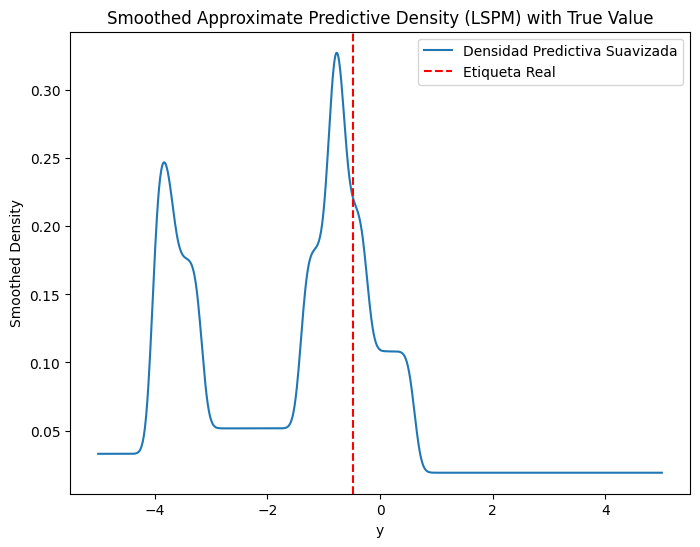

In [ ]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def generate_synthetic_data(n, p, seed=42):
    """Genera datos sintéticos para regresión.
    
    Args:
      n: Número de observaciones.
      p: Número de atributos.

    Returns:
        X: Matriz de atributos (n x p).
        y: Vector de etiquetas (n).
    """
    np.random.seed(seed)
    X = np.random.randn(n, p)
    # Añadimos una columna de 1s para el bias
    X = np.concatenate((np.ones((n, 1)), X), axis=1)
    true_w = np.random.randn(p + 1)
    y = np.dot(X, true_w) + np.random.randn(n) # y = w*X + error
    return X, y


def compute_hat_matrix(X):
    """Calcula la matriz hat.

    Args:
        X: Matriz de atributos (n x p).

    Returns:
       H: Matriz hat (n x n).
    """
    return X @ np.linalg.inv(X.T @ X) @ X.T


def compute_A_and_B(X_train, y, hat_matrix, i):
    """Calcula A_i y B_i para el LSPM studentizado.

    Args:
      X_train: Matriz de atributos (n x p) solo de entrenamiento.
      y: Vector de etiquetas (n).
      hat_matrix: Matriz hat (n+1 x n+1).
      i: Índice de la observación a procesar (entre 0 y n-1).

    Returns:
      A_i, B_i
    """
    n = len(y)
    p = X_train.shape[1]

    # Calcular la matriz hat SOLO para los datos de entrenamiento
    hat_matrix_train = compute_hat_matrix(X_train)
    y_hat = hat_matrix_train @ y  # Predicciones de mínimos cuadrados SOLO en entrenamiento.

    B_i = np.sqrt(1 - hat_matrix[n, n]) + (hat_matrix[i, n] / np.sqrt(1 - hat_matrix[i, i]))
    A_i = 0
    for j in range(n):
        A_i += (hat_matrix[j, n]*y[j])/np.sqrt(1 - hat_matrix[n,n]) # A_i para el residuo studentizado
    A_i += y[i] / np.sqrt(1 - hat_matrix[i, i])

    return A_i, B_i

def compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=False, sigma=0.2):
    """Calcula y visualiza la función de densidad predictiva aproximada y suavizada del RPD, mostrando el punto real.
    
    Args:
      X_train: Matriz de atributos de entrenamiento (n x p).
      y_train: Vector de etiquetas de entrenamiento (n).
      x_test: Vector de atributos de prueba (1 x p).
      true_y: Valor real de la etiqueta para el punto de prueba.
      y_range: Intervalo de valores y en los que se calculará la densidad.
      plot: Booleano, si se visualiza o no la densidad predictiva.
      sigma: Desviación estandar para el filtro gaussiano.

    Returns:
      y_values: array de valores de y en el intervalo y_range.
      density_smooth: array de valores de la densidad suavizada asociada a cada valor de y.
    """
    
    X = np.concatenate((X_train, x_test.reshape(1,-1)), axis=0)
    hat_matrix = compute_hat_matrix(X)
    n = len(y_train) # Número de observaciones de entrenamiento
    C = []
    for i in range(n):
        A_i, B_i = compute_A_and_B(X_train, y_train, hat_matrix, i)
        if B_i != 0:
            C.append(A_i/B_i)
        else:
            C.append(np.inf)
    C = np.array(C)
    C = np.sort(C)

    quantiles = [float('-inf')] + list(C) + [float('inf')]
    probabilities = [0] + [(i + 1) / (n + 1) for i in range(n)] + [1]

    density = []
    y_values = np.linspace(y_range[0], y_range[1], 1000)

    for y in y_values:
        for i in range(len(quantiles) - 1):
            if quantiles[i] <= y < quantiles[i+1]:
                density.append((probabilities[i+1]-probabilities[i]) / (quantiles[i+1] - quantiles[i]))
                break
            elif y == quantiles[i]:
                density.append((probabilities[i]-probabilities[i-1]) / (quantiles[i]-quantiles[i-1]))
                break
            elif y == quantiles[i+1]:
                density.append((probabilities[i+2]-probabilities[i+1]) / (quantiles[i+2]-quantiles[i+1]))
                break
    
    # Aplicar filtro gaussiano
    density_smooth = gaussian_filter1d(density, sigma=10) # sigma es un parámetro que controla el suavizado

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(y_values, density_smooth, label="Densidad Predictiva Suavizada")
        plt.axvline(true_y, color='r', linestyle='--', label="Etiqueta Real")
        plt.xlabel("y")
        plt.ylabel("Smoothed Density")
        plt.title("Smoothed Approximate Predictive Density (LSPM) with True Value")
        plt.legend()
        plt.show()
    
    return y_values, density_smooth



if __name__ == "__main__":
    # 1. Generar datos sintéticos
    n = 10  # Número de observaciones
    p = 3   # Número de atributos
    X_train, y_train = generate_synthetic_data(n, p)
    # Creamos un vector de test y su etiqueta real
    x_test = np.random.randn(1, p+1) 
    true_w = np.random.randn(p + 1)
    true_y = np.dot(x_test, true_w) + np.random.randn(1)
    
    y_range = (-5, 5)  # Rango de valores para y
    sigma = 0.2

    # 2. Calcular y visualizar la densidad predictiva suavizada
    y_values, density_smooth = compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=True, sigma=sigma)

/tmp/ipykernel_18493/1572639707.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] =  np.dot(X[i], true_w)  + np.random.randn(1)


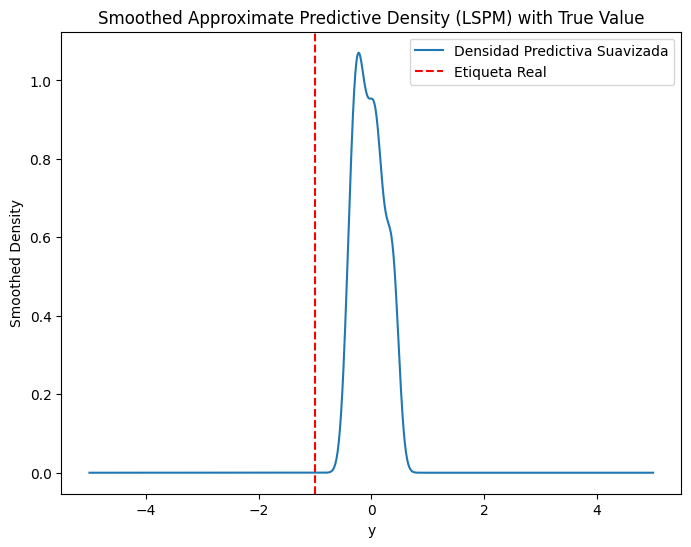

In [15]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def generate_time_series_data(n, p, drift_strength=0.1, seed=42):
    """Genera datos sintéticos para una serie temporal con deriva en las etiquetas.
    
    Args:
      n: Número de observaciones.
      p: Número de atributos.
      drift_strength: La fuerza de la deriva de distribución.
      seed: Semilla aleatoria.
    
    Returns:
      X: Matriz de atributos (n x p).
      y: Vector de etiquetas (n).
    """
    np.random.seed(seed)
    X = np.random.randn(n, p)
    # Añadimos una columna de 1s para el bias
    X = np.concatenate((np.ones((n, 1)), X), axis=1)
    true_w = np.zeros(p + 1)
    true_w[0] = 1  # Intercepto
    for i in range(1,p+1):
      true_w[i] = 1+(i-1)*drift_strength
    
    y = np.zeros(n)

    for i in range(n):
      y[i] =  np.dot(X[i], true_w)  + np.random.randn(1)
    return X, y


def compute_hat_matrix(X):
    """Calcula la matriz hat.

    Args:
        X: Matriz de atributos (n x p).

    Returns:
       H: Matriz hat (n x n).
    """
    return X @ np.linalg.inv(X.T @ X) @ X.T


def compute_A_and_B(X_train, y, hat_matrix, i, w, normalized_weights):
    """Calcula A_i y B_i para el LSPM studentizado.

    Args:
      X_train: Matriz de atributos (n x p) solo de entrenamiento.
      y: Vector de etiquetas (n).
      hat_matrix: Matriz hat (n+1 x n+1).
      i: Índice de la observación a procesar (entre 0 y n-1).
      w: Vector de pesos de las observaciones.
      normalized_weights:  Pesos normalizados.

    Returns:
      A_i, B_i
    """
    n = len(y)
    p = X_train.shape[1]

    # Calcular la matriz hat SOLO para los datos de entrenamiento
    hat_matrix_train = compute_hat_matrix(X_train)
    y_hat = hat_matrix_train @ y  # Predicciones de mínimos cuadrados SOLO en entrenamiento.

    B_i = np.sqrt(1 - hat_matrix[n, n]) + (hat_matrix[i, n] / np.sqrt(1 - hat_matrix[i, i]))

    A_i = 0
    for j in range(n):
      A_i += normalized_weights[j]* (hat_matrix[j, n]*y[j])/np.sqrt(1 - hat_matrix[n,n]) # A_i para el residuo studentizado
    A_i += normalized_weights[i]* y[i] / np.sqrt(1 - hat_matrix[i, i])

    return A_i, B_i


def compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=False, sigma=0.2, w = None, decay_factor = 0.99):
    """Calcula y visualiza la función de densidad predictiva aproximada y suavizada del RPD, mostrando el punto real.
    
    Args:
      X_train: Matriz de atributos de entrenamiento (n x p).
      y_train: Vector de etiquetas de entrenamiento (n).
      x_test: Vector de atributos de prueba (1 x p).
      true_y: Valor real de la etiqueta para el punto de prueba.
      y_range: Intervalo de valores y en los que se calculará la densidad.
      plot: Booleano, si se visualiza o no la densidad predictiva.
      sigma: Desviación estandar para el filtro gaussiano.
      w: Vector de pesos de las observaciones.
      decay_factor: Factor para el decaimiento exponencial de los pesos.

    Returns:
      y_values: array de valores de y en el intervalo y_range.
      density_smooth: array de valores de la densidad suavizada asociada a cada valor de y.
    """
    
    X = np.concatenate((X_train, x_test.reshape(1,-1)), axis=0)
    hat_matrix = compute_hat_matrix(X)
    n = len(y_train) # Número de observaciones de entrenamiento
    C = []

    if w is None:
        w = np.array([decay_factor**(n - i - 1) for i in range(n)])

    normalized_weights = w / np.sum(w)
  
    for i in range(n):
        A_i, B_i = compute_A_and_B(X_train, y_train, hat_matrix, i, w, normalized_weights)
        if B_i != 0:
            C.append(A_i/B_i)
        else:
            C.append(np.inf)
    C = np.array(C)
    C = np.sort(C)

    quantiles = [float('-inf')] + list(C) + [float('inf')]
    probabilities = [0]
    for i in range(n):
        probabilities.append(np.sum(normalized_weights[:i+1]))
    probabilities.append(1)

    density = []
    y_values = np.linspace(y_range[0], y_range[1], 1000)

    for y in y_values:
        for i in range(len(quantiles) - 1):
            if quantiles[i] <= y < quantiles[i+1]:
                density.append((probabilities[i+1]-probabilities[i]) / (quantiles[i+1] - quantiles[i]))
                break
            elif y == quantiles[i]:
                density.append((probabilities[i]-probabilities[i-1]) / (quantiles[i]-quantiles[i-1]))
                break
            elif y == quantiles[i+1]:
                density.append((probabilities[i+2]-probabilities[i+1]) / (quantiles[i+2]-quantiles[i+1]))
                break
    
    # Aplicar filtro gaussiano
    density_smooth = gaussian_filter1d(density, sigma=10) # sigma es un parámetro que controla el suavizado

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(y_values, density_smooth, label="Densidad Predictiva Suavizada")
        plt.axvline(true_y, color='r', linestyle='--', label="Etiqueta Real")
        plt.xlabel("y")
        plt.ylabel("Smoothed Density")
        plt.title("Smoothed Approximate Predictive Density (LSPM) with True Value")
        plt.legend()
        plt.show()
    
    return y_values, density_smooth



if __name__ == "__main__":
    # 1. Generar datos sintéticos
    n = 10  # Número de observaciones
    p = 3   # Número de atributos
    drift_strength = 0.02
    X_train, y_train = generate_time_series_data(n, p, drift_strength)
    # Creamos un vector de test y su etiqueta real
    x_test = np.random.randn(1, p+1) 
    true_w = np.zeros(p+1)
    true_w[0] = 1
    for i in range(1,p+1):
      true_w[i] = 1+(i-1)*drift_strength
    true_y = np.dot(x_test, true_w) + np.random.randn(1)

    y_range = (-5, 5)  # Rango de valores para y
    sigma = 0.2
    decay_factor = 0.99

    # 2. Calcular y visualizar la densidad predictiva suavizada
    y_values, density_smooth = compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=True, sigma=sigma, decay_factor = decay_factor)